Author : Davidson Siga (Grad at CMU)

CMU ID : dsiga


# Introduction & Motivation

Have you ever wondered how Stock Market Traders use historical time series stock data to make profits?

Time Series Forecasting is one of the most prominent prediction approach taken towards making investment decisions in the Stock Market Trading by independent traders or the Big Financial Institutions.

[Google AI's Research](https://ai.googleblog.com/2021/12/interpretable-deep-learning-for-time.html#:~:text=Deep%20neural%20networks%20(DNNs)%20have,over%20traditional%20time%20series%20models.) tells us that Deep Neural Networks have started taking over the Traditional Time Series Forecasting Methods.

This tutorial will introduce you to Long short-term memory, one of the prominent deep learning methods used for Time Series Forecasting.

ARIMA, a prominent Traditional Time Series Forecasting method with great results in the past.
[IEEE Research](https://par.nsf.gov/servlets/purl/10186768) shows that 
LSTM significantly beats ARIMA on Financial Data and more.

This Tutorial will help you code and experimentally analyze,model, and evaluate how well LSTM could perform on real world time series data from 
[Yahoo Finance's Apple Stock Data](https://finance.yahoo.com/quote/AAPL?p=AAPL).



## Assumptions and Scope of this Tutorial
---
This tutorial assumes that you breifly understand Pytorch and how to use it.

The Focus is on teaching the audience about understanding the coding/implementing LSTM for Time Series Forecasting and help of Pytorch.

## Helpful Theory for this Tutorial!

  We shall look into two key concepts:
  1. Time Series Forecasting
  2. Long Short Term Memory Networks

#### What is Time Series Forecasting?
My apple tree had 1 apple yesterday.
My apple tree has 2 apples today.
I'm expecting it to have 3 apples tomorrow.

What have we done here? 
We analysed the counts of apples on the apple tree and made a forecast for the third day.
In short, that is time series forecasting.

The key idea here is to forecast values by looking at historical data in TIME through well-planned mathematical algorithms/models. The model here should be able to "FIT"/ Learn the information it has seen and make a sensible prediction/FORECAST for the future.

The selection of the "Models" should come through an evidence-based comparison of forecasting evaluation metrics. We shall dwell on these towards the end of the tutorial.

#### What is LSTM?
In short, to know LSTM,
we would need to dwell into 
  1. [Deep Learning](https://deeplearning.cs.cmu.edu/S22/index.html) Courtesy: CMU
  2. [Recurrent Neural Networks](https://deeplearning.cs.cmu.edu/S22/document/slides/lec14.recurrent.pdf) Courtesy: CMU
  3. Finally, the [LSTM Algorithm](https://arxiv.org/abs/1909.09586) 

These areas are vast and the scope of the tutorial is to help you implement LSTM and not teach through all the above.

Hence, We will Focus on the Last segment, i.e. the LSTM Algorithm.

#### Now, What is LSTM?

LSTM is an improved RNN architecture in the realm of Deep Learning. A regular Neural Network would not be processing data sequentially. It would learn, forget and relearn.

However, an RNN takes this further by learning the data in sequence by remembering past information.

A vital issue with RNN is that it tends to forget the past too quickly; this is called the vanishing gradient problem.
Hence, LSTM was introduced to help remember the past relevant information better.

LSTMs have been used for many successful use cases across business domains and data formats. Ranging from Simple Numerical to Complex Video Image Data.
 


# Tutorial content

In this tutorial, we will show how to do Time Series Forecasting with a Deep Learning Method : LSTM in Python, specifically using [PyTorch](https://pytorch.org/docs/stable/index.html), [scikit-learn](https://scikit-learn.org/stable/), and [matplotlib](https://matplotlib.org/).

As mentioned earlier, we will look into Yahoo Finance Open Source Dataset. For this Tutorial we can use the last 5 Years infromation of [Apple's](https://www.apple.com/) Daily Closeing stock prices.


This tutorial has the following content:

-[Imports and Installs](#cell-id1)

-[Data Loading and Data Checks](#cell-id2)

-[Data Analysis](#cell-id3)

-[Data Processing and Loading](#cell-id4)

-[Feature Engineering](#cell-id5)

-[LSTM Architecture](#cell-id6)

-[Time Series Modelling with LSTM](#cell-id7)

-[Validating the LSTM](#cell-id8)

-[Evaluating the LSTM](#cell-id9)

-[Conclusion](#cell-id10)

<a name="cell-id1"></a>
# Imports and Installs

All the below libraries would be useful in executing the below.

This Tutorial Considers Google Colab Base packages as the starting point for importing packages.

None of the below libraries are missing in Google Colab's startup environment.

In [ ]:
# However, if anything is not loading you can load it through:
# !pip install <library>

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import datetime

## Why did we import these libraries?


---


Numpy, useful for pytorch operations

Matplotlib, useful for plotting outputs

Pandas, useful for storing,accessing and transforming data

Torch, deep learning framework consists of tools to utilize LSTM

Sklearn, Machine Learning & Statistics library consists of ML,Stats and Data Processing functions

Datetime, helps handle date datatypes

In [ ]:
# You can Run git clone from the command line within colab notebook environment
# Google Colab : https://colab.research.google.com/
# The below dataset can be obtained from yahoo finance
# But for ease, I have made it available on my GitHub Repositry

!git clone https://github.com/sigadavid96/LSTM_TimeSeriesForecasting

fatal: destination path 'LSTM_TimeSeriesForecasting' already exists and is not an empty directory.


The data has now been loaded into your local/colab environment

<a name="cell-id2"></a>
# Data Load and Data Checks

We now load and store the .csv into a pandas dataframe.
Path of the .csv file needs to be changed if you're not working on Colab.

In [ ]:
# Storing the data into pandas dataframe

# Path of the .csv file
df_path = '/content/LSTM_TimeSeriesForecasting/AAPL.csv'

# Store the .csv data into the pandas dataframe
df=pd.read_csv(df_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-06,36.072498,36.130001,35.862499,35.915001,33.909504,84596000
1,2017-04-07,35.932499,36.044998,35.817501,35.834999,33.833965,66688800
2,2017-04-10,35.900002,35.970001,35.724998,35.792500,33.793854,75733600
3,2017-04-11,35.735001,35.837502,35.014999,35.407501,33.430347,121517600
4,2017-04-12,35.400002,35.537498,35.252499,35.450001,33.470470,81400000


Missingness and Format check is Essential!
While working with an external data source, it is always a good idea to check the formatting and missingness of data.

In [ ]:
# Looking at the datatypes
df.info()
# We should convert Date to datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


We identified that the Date format is incorrect and needs to be changed

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


The Date format has been successfully changed in the above output

We now try to understand the range of information we have!, Moving into Data Analysis

<a name="cell-id3"></a>
#Data Analysis

In [ ]:
print("Range of Dates: \n First Day :", 
      min(df['Date']), "\n Last Day :", 
      max(df['Date']))
print("Number of Datapoints",len(df),"Number of years:",max(df['Date']).year-min(df['Date']).year)

Range of Dates: 
 First Day : 2017-04-06 00:00:00 
 Last Day : 2022-04-05 00:00:00
Number of Datapoints 1259 Number of years: 5


In [ ]:
# we have around 5 years of data

In [ ]:
# Looking at the stats of the data 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,81.654784,82.573819,80.776900,81.720985,80.541057,1.202587e+08
std,44.370998,44.924198,43.824674,44.407423,44.894697,5.545213e+07
min,35.305000,35.470001,35.014999,35.169998,33.206104,4.100000e+07
25%,43.911251,44.405000,43.648748,44.056252,42.404394,8.352340e+07
50%,57.020000,57.482498,56.657501,56.997501,55.683498,1.052076e+08
75%,123.960003,125.294998,122.250000,124.325001,123.262616,1.401866e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,4.265100e+08


In [ ]:
# Setting the index as 'Date', this will help us with plotting and indexing the data
df=df.set_index('Date')

# Selecting only the Close column because, for this tutorial, we plan to 
# Look specifically at end of day closing price of the interested stock
df_clean=df[['Close']]

# We shall use the df_clean pandas dataframe to work with modelling
df_clean.head()

,Close
Date,
2017-04-06,35.915001
2017-04-07,35.834999
2017-04-10,35.792500
2017-04-11,35.407501
2017-04-12,35.450001


Lets visualize how the Time Series Data of Stock's Closing price varies in time

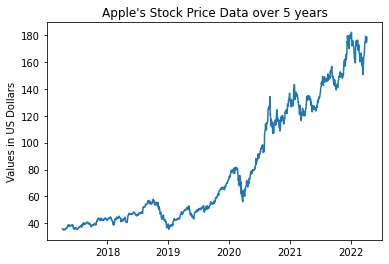

In [ ]:
# Using the matplotlibs abilites to directly plot the dataframe
# The Date index in our dataframe helps matplotlib to plot it  :)

plt.plot(df_clean)
plt.title("Apple's Stock Price Data over 5 years")
plt.ylabel('Values in US Dollars')
plt.show()

Apple might have had hiccups over the last 5 years, but we see a constant upward trend in thier stock's growth.
The Apple Inc. stocks have gone 4X in 5 years! 

<a name="cell-id4"></a>
#Data Processing and Loading into tensors for PyTorch

Pytorch works with numpy arrays and converting numpy to tensors is easier.
We shall work with the values of the close column of dataset

In [ ]:
# We shall work with the values of the close dataset

df_pytorch = df_clean[['Close']].values

In [ ]:
# LSTM is a recurrent neural network which models on the sequence prediction
# To predict a sequence, LSTM models on a Window like sequence of inputs

def LSTM_Data_input_generation(window_size):
    
    # The training sequence is the window_size'd list of training inputs 
    # which the model fits on. Basically the window_size-1 features
    train_seq = []

    # The model trains on teh window_size'd features to predict window_size'th output
    # This below variable helps us keep a track of that
    pred_seq = []

    # The window to create a sequence for inputs, can only go up unil the window has all spaces filled within
    # Mathematically, 
    max_window_traversal=df_pytorch.shape[0]-window_size-1

    for curr_seq_no in range(0,max_window_traversal,1):
        # Takes the window number of inputs but the last input
        train_seq.append(df_pytorch[curr_seq_no:curr_seq_no+window_size])

        # Takes the last input in the window
        pred_seq.append(df_pytorch[curr_seq_no+window_size])

    return train_seq,pred_seq

<a name="cell-id5"></a>
# Feature Engineering
There is a need of rescaling the data because LSTM functions on a optimizing a loss function. The optimizer works on reaching the minima through a learning rate.
The learning rate is often small. If the data is of a larger scale, it will cause the learning rate to be insignificant. Hence, rescaling will help us avoid this issue.

Since each datapoint is important in a timeseries exercise, we choose not to remove any datapoints.

In [ ]:
# We rescale the data to have a better looking distribution for the model
# MinMaxScaler is a safe approach as it moves all data into -1 to +1 range

RememberThisScaler=MinMaxScaler()
df_pytorch = RememberThisScaler.fit_transform(df_pytorch)

In [ ]:
# We could use a two week window, i.e 14
window_size = 14

# The LSTM_Data_input_generation functions helps us convert data into a feature sequence  + expected prediction data

feats, preds = LSTM_Data_input_generation(window_size)

Lets look at how a feature and corresponding real y/next datapoint looks like

In [ ]:
feats[0]

array([[0.00507357],
       [0.00452875],
       [0.00423932],
       [0.00161743],
       [0.00190686],
       [0.00062996],
       [0.00195793],
       [0.00088532],
       [0.        ],
       [0.00299648],
       [0.00270705],
       [0.00503951],
       [0.00655477],
       [0.0051076 ]])

In [ ]:
preds[0]

array([0.00529488])

Since we we're now able to push a list of sequences into the LSTM architechture, we shall now focus on splitting the dataset into train,validate and test datasets.

<a name="cell-id6"></a>
# LSTM Architecture

In [ ]:
# This is the stanadard way of building a Nerural Network Architecture in Pytorch

# To keep this Architecture simple, we can use the below parameters to design LSTM architecture

class My_Neural_Network(nn.Module):

    def __init__(self,input_size, hidden_size, num_layers,bias,output_size):
        
        # Essential to call the super class to initate the object in pytorch
        
        super(My_Neural_Network, self).__init__()

        # init the model params
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        
        # Init the lstm layer
        self.LSTM = nn.LSTM(batch_first=True,input_size=input_size, hidden_size=hidden_size,num_layers=num_layers)

        # The last layer takes all LSTM outputs and makes a linear layer to output a value
        self.OutputLayer = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):

        # Pytorch requires inputs to be in the below format
        input1=x
        input2_1 = torch.zeros(self.num_layers,len(input1),self.hidden_size)
        input2_2 = torch.zeros(self.num_layers,len(input1),self.hidden_size)
        input2=(input2_1,input2_2)


        # Writing the Lstm forward step with the given inputs from the data
        out1, (out2, out3) = self.LSTM(input1,input2)
        
        # Transforming the data into the output format 
        out2 = out2.view(-1, self.hidden_size)
        
        # This forward pass will be useful for back propogation
        return self.OutputLayer(out2)

### Cross Validation
70-20-10 would be a reasonable split of datapoints because, we'd often want as much as information into the sequential training. Time series datasets are often scarce.

In [ ]:
# Let us use the 70-20-10 split 

train_size = int(len(preds) * 0.70)
validate_size = int(len(preds) * 0.20)
test_size=(len(preds) - (validate_size+train_size))

# Converting the numpy data into tensors for pytorch operations

tensor_feats = torch.Tensor(np.array(feats))
tensor_preds = torch.Tensor(np.array(preds))

# Train 
Train_tensor_feats=tensor_feats[:train_size]
Train_tensor_preds=tensor_preds[:train_size]

# Validate

Validate_tensor_feats=tensor_feats[train_size:train_size+validate_size]
Validate_tensor_preds=tensor_preds[train_size:train_size+validate_size]

# Test

Test_tensor_feats=tensor_feats[train_size+validate_size:]
Test_tensor_preds=tensor_preds[train_size+validate_size:]


Data Split Verification helps us keep a track of how much data is going into which variables

In [ ]:
# Verifying if the data has split correctly
print("Train Sizes: ",len(Train_tensor_feats),len(Train_tensor_preds),train_size)
print("Validate Sizes: ",len(Validate_tensor_feats),len(Validate_tensor_preds),validate_size)
print("Test Sizes: ",len(Test_tensor_feats),len(Test_tensor_preds),test_size)

Train Sizes:  870 870 870
Validate Sizes:  248 248 248
Test Sizes:  126 126 126


<a name="cell-id7"></a>
#Time Series Modelling with LSTM

Pytorch is a great Framework which helps us in building our own Neural Network Architechtures to perform deep learning.

Below we will create our LSTM architecture.

### As per [Official LSTM Pytorch Documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html): 

Below are the parameter definations:

input_size – The number of expected features in the input x

hidden_size – The number of features in the hidden state h

num_layers – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two LSTMs together to form a stacked LSTM, with the second LSTM taking in outputs of the first LSTM and computing the final results. Default: 1

bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True

batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False

dropout – If non-zero, introduces a Dropout layer on the outputs of each LSTM layer except the last layer, with dropout probability equal to dropout. Default: 0

bidirectional – If True, becomes a bidirectional LSTM. Default: False

proj_size – If > 0, will use LSTM with projections of corresponding size. Default: 0

Intitalizing all the model variables

In [ ]:
# Hence we begin initalizing the parameters required for the LSTM design
# we can wrap these around a parameter variable

input_size = 1
hidden_size = window_size
num_layers = 1
bias=False
output_size = 1


Initializing the number if epochs we want to run the model on.

Initializing the learning rate

In [ ]:
epochs = 1000
lr = 0.01

In [ ]:
# Initialize the model
my_model = My_Neural_Network(input_size, hidden_size, num_layers,bias,output_size)

In [ ]:
# Optimizer and Loss function needs to be defined

# We can use any kind of loss & optim function, but in this case we use MSE and SGD
# Since we're working with Time series data, best loss we want to min is the MSE loss
criterion = torch.nn.MSELoss()    

# Through experimentation, ADAM was better than SGD. You can try with the below code.

# optimizer = torch.optim.SGD(my_model.parameters(), lr=lr)
optimizer = torch.optim.Adam(my_model.parameters(), lr=lr)

Training the model

In [ ]:
# Train the model

for epoch in range(epochs):
    optimizer.zero_grad()
    
    outputs = my_model(Train_tensor_feats)
    
    # See how much loss is present
    loss = criterion(outputs, Train_tensor_preds)
    
    # Backward pass the loss value to the model to help it improve
    loss.backward()
    
    # Step away from the gradient 
    optimizer.step()
    
    if epoch % 50 == 0:
      print("Epoch: ",epoch," , loss: ",loss.item())

Epoch:  0  , loss:  0.02513449266552925
Epoch:  50  , loss:  0.0002696300798561424
Epoch:  100  , loss:  0.0001769569789757952
Epoch:  150  , loss:  0.00016699492698535323
Epoch:  200  , loss:  0.0001565597194712609
Epoch:  250  , loss:  0.00014580448623746634
Epoch:  300  , loss:  0.00013469194527715445
Epoch:  350  , loss:  0.0001241947611561045
Epoch:  400  , loss:  0.0001175792858703062
Epoch:  450  , loss:  0.00011344539962010458
Epoch:  500  , loss:  0.0001098140055546537
Epoch:  550  , loss:  0.0001065422547981143
Epoch:  600  , loss:  0.00010361193562857807
Epoch:  650  , loss:  0.00010383492190157995
Epoch:  700  , loss:  9.972143016057089e-05
Epoch:  750  , loss:  9.775683429325e-05
Epoch:  800  , loss:  9.610890265321359e-05
Epoch:  850  , loss:  9.802948625292629e-05
Epoch:  900  , loss:  9.44964776863344e-05
Epoch:  950  , loss:  9.320693789049983e-05


We can see a decreasing trend in the MSE loss which is a good sign :)

<a name="cell-id8"></a>
#Validating the LSTM

In [ ]:
# we put the model into evaluation mode for validation and testing
my_model.eval()


My_Neural_Network(
  (LSTM): LSTM(1, 14, batch_first=True)
  (OutputLayer): Linear(in_features=14, out_features=1, bias=True)
)

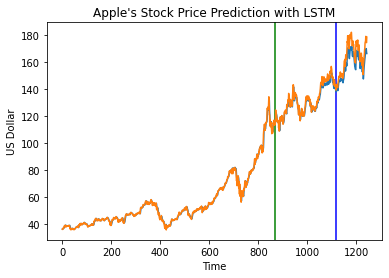

In [ ]:
# Getting the model outputs when we give it the full data
model_outputs = my_model(tensor_feats)

# Converting the model outputs back to numpy format
model_outputs = model_outputs.data.numpy()
preds_numpy = tensor_preds.data.numpy()

# We need to revert the scaling done earlier to be able to retreive the orignial scale
og_pred_x = RememberThisScaler.inverse_transform(model_outputs)
og_y = RememberThisScaler.inverse_transform(preds_numpy)

plt.axvline(x=train_size, c='g', linestyle='-')
plt.axvline(x=train_size+validate_size, c='b', linestyle='-')

plt.plot(og_pred_x)
plt.plot(og_y)
plt.title("Apple's Stock Price Prediction with LSTM")
plt.xlabel("Time")
plt.ylabel("US Dollar")
plt.show()

Visually our LSTM model is able to model the data very well.

The training data (before the green line) has really great fit

The validation data (between the green and blue line) has a good predictive ability. Almost correct.

The test data(After the Blue Line) has started worsening, but gives us some great prediction.

But how do we know how well we have performed? We can use evaluation metrics.

<a name="cell-id9"></a>
# Evaluating the LSTM

In time series forecasting or regression, one of the best metrics to validate the fit of a line on data is by looking at ROOT MEAN SQUARE ERROR.

Sklearn has a package which helps us calculate this loss easily.
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [ ]:
from sklearn.metrics import mean_squared_error

overall_MSE = mean_squared_error(og_pred_x, og_y, squared=False)
print("overall Mean Squared Error (All data): ",overall_MSE)


overall Mean Squared Error (All data):  2.7933238


In [ ]:
# A simple function to calculate and print the MSE
def calc_MSE_onData(Train_tensor_feats,Train_tensor_preds,text):
  # Getting the model outputs when we give it the full data
  model_outputs = my_model(Train_tensor_feats)

  # Converting the model outputs back to numpy format
  model_outputs = model_outputs.data.numpy()
  preds_numpy = Train_tensor_preds.data.numpy()

  # We need to revert the scaling done earlier to be able to retreive the orignial scale
  og_pred_x = RememberThisScaler.inverse_transform(model_outputs)
  og_y = RememberThisScaler.inverse_transform(preds_numpy)


  MSE = mean_squared_error(og_pred_x, og_y, squared=False)
  print("Mean Squared Error (",text," data): ",MSE)



This LSTM MODEL can now be stored and used to forecase Apple Inc. Stocks in the future!

In [ ]:
# Pytorch can load and save any model very easily!
torch.save(my_model, 'LSTM_on_Apple.pth')
my_modelsaved=torch.load('LSTM_on_Apple.pth')

In [ ]:
my_modelsaved

My_Neural_Network(
  (LSTM): LSTM(1, 14, batch_first=True)
  (OutputLayer): Linear(in_features=14, out_features=1, bias=True)
)

In [ ]:
calc_MSE_onData(Train_tensor_feats,Train_tensor_preds,"train")

Mean Squared Error ( train  data):  1.409545


In [ ]:
calc_MSE_onData(Validate_tensor_feats,Validate_tensor_preds,"validation")

Mean Squared Error ( validation  data):  2.813782


In [ ]:
calc_MSE_onData(Test_tensor_feats,Test_tensor_preds,"test")

Mean Squared Error ( test  data):  6.9089713


We can clearly see that with time, as the model stop seeing the data. 
It starts to detoriate its predictive power.
The loss increases from Train to Validate to Test Data

<a name="cell-id10"></a>
# Conclusion

We can conclude that LSTM is able to fit the data very well, but is only able to perform well for a smaller future forecasts. This could be because of its squential nature of forecasting.

However, LSTM/Deep Learning for Time Series Forecasting has started to become popular and we might see it improve further through research and innovation.


Thank you for reading all the way through. Hope this was useful.

# Future Readings

You can look up the links which were suggested throughout this Notebook.
Additionally,

The following links might be helpful to dwell into LSTM.

[Colah's Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

[Youtube : Illustrated Guide to LSTM's and GRU's: A step by step explanation](https://www.youtube.com/watch?v=8HyCNIVRbSU)

Starting on Deep Learning?

[neuralnetworksanddeeplearning](http://neuralnetworksanddeeplearning.com/)

[CMU's Intro to Deep Learning](https://deeplearning.cs.cmu.edu/S22/index.html)

[Andrew Ng's Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning)





